# Yu Tian 

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt


### Research Question & interests
which song stayed at the board the longest?

which artist has the most songs that entered billboard?

What is the relation between each column?

In [31]:
df=pd.read_csv("D:\charts.csv.zip")
#Loading data
df

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
0,1,Butter,BTS,1.0,1,7,2021-07-17
1,2,Good 4 U,Olivia Rodrigo,2.0,1,8,2021-07-17
2,3,Levitating,Dua Lipa Featuring DaBaby,4.0,2,40,2021-07-17
3,4,Kiss Me More,Doja Cat Featuring SZA,3.0,3,13,2021-07-17
4,5,Montero (Call Me By Your Name),Lil Nas X,8.0,1,15,2021-07-17
...,...,...,...,...,...,...,...
328482,96,Over And Over,Thurston Harris,NaN,96,1,1958-08-04
328483,97,I Believe In You,Robert & Johnny,NaN,97,1,1958-08-04
328484,98,Little Serenade,The Ames Brothers,NaN,98,1,1958-08-04
328485,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1,1958-08-04


### Exploratory Data Analysis & Pipeline

In [32]:
df.columns

Index(['rank', 'song', 'artist', 'last-week', 'peak-rank', 'weeks-on-board',
       'date'],
      dtype='object')

In [38]:
df=df.drop(df.index[160000:328487])
#reduced the dataset into half, which is more recent music
df

,rank,song,artist,last-week,peak-rank,weeks-on-board,date
0,1,Butter,BTS,1.0,1,7,2021-07-17
1,2,Good 4 U,Olivia Rodrigo,2.0,1,8,2021-07-17
2,3,Levitating,Dua Lipa Featuring DaBaby,4.0,2,40,2021-07-17
3,4,Kiss Me More,Doja Cat Featuring SZA,3.0,3,13,2021-07-17
4,5,Montero (Call Me By Your Name),Lil Nas X,8.0,1,15,2021-07-17
...,...,...,...,...,...,...,...
159995,96,Doin' The Do,Betty Boo,91.0,90,4,1990-11-24
159996,97,Release Me,Wilson Phillips,79.0,1,22,1990-11-24
159997,98,Let's Try It Again,New Kids On The Block,78.0,53,8,1990-11-24
159998,99,Love Is The Ritual,Styx,88.0,80,6,1990-11-24


In [42]:
df.nunique(axis=0)
#There are 10630 songs in total. 5421 artist and one song stayed on Billboard for 87 weeks

rank                100
song              10630
artist             5421
last-week           100
peak-rank           100
weeks-on-board       87
date               1600
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160000 entries, 0 to 159999
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rank            160000 non-null  int64  
 1   song            160000 non-null  object 
 2   artist          160000 non-null  object 
 3   last-week       146078 non-null  float64
 4   peak-rank       160000 non-null  int64  
 5   weeks-on-board  160000 non-null  int64  
 6   date            160000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 9.8+ MB


Text(0.5, 1.0, 'Correlation with each column')

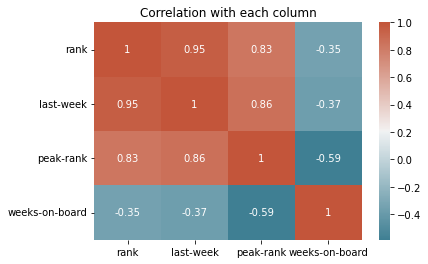

In [39]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True)).set_title("Correlation with each column")
#The peak rank is is generally loewwer than the peak rank and curren rank with a positive relation. 

<AxesSubplot:xlabel='rank', ylabel='weeks-on-board'>

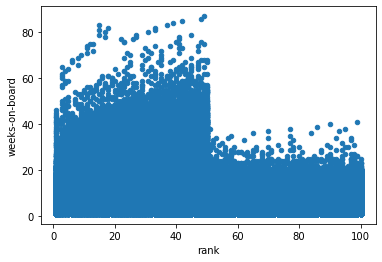

In [61]:
df.plot(kind='scatter', x='rank', y='weeks-on-board')
# there is a huge gap when at rank #50, rank above #50 tends to stay in the chart longer, which means that the better song ranked, the longer sonf stayed

<AxesSubplot:xlabel='peak-rank', ylabel='weeks-on-board'>

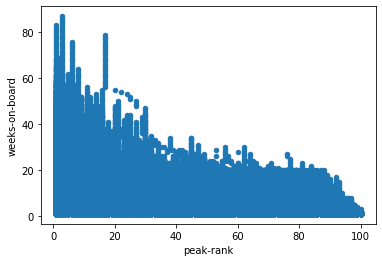

In [63]:
df.plot(kind='scatter', x='peak-rank', y='weeks-on-board')
#the higher song peak-ranked, the longer they stayed

In [41]:
df.max()
#this song has stayed in billboard the longest 

rank                                                            100
song                                                     www.memory
artist            will.i.am Featuring Miley Cyrus, French Montan...
last-week                                                     100.0
peak-rank                                                       100
weeks-on-board                                                   87
date                                                     2021-07-17
dtype: object

In [44]:
df['artist'].value_counts().idxmax()
# Taylor Swift is the artist that entered the Billboard the most.

'Taylor Swift'

In [46]:
df['song'].value_counts().idxmax()
#The song named "stay" has appear in the Board the most

'Stay'

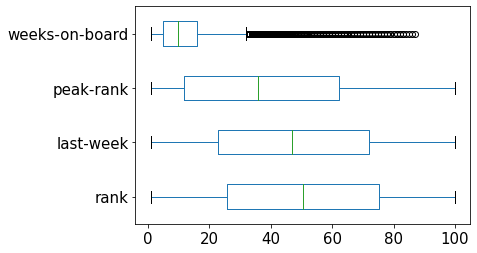

In [50]:
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)
#Songs normally last 5-20 weeks, and the peak rank of songs normally are at #10 to #60

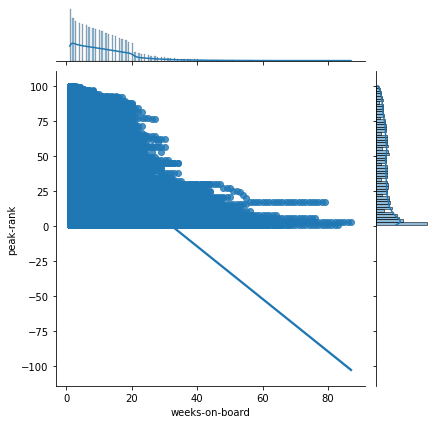

In [58]:
sns.jointplot(x='weeks-on-board', y='peak-rank', data=df, kind='reg')

### Method Chaing 

In [60]:
def load_and_process(df):
    df1=(
        pd.read_csv("D:\charts.csv.zip")
        .columns
        .drop(df.index[160000:328487])
        .nunique(axis=0)
        .info()
    )
    df2=(
        df1
        .plot(kind='scatter', x='rank', y='weeks-on-board')
        .plot(kind='scatter', x='peak-rank', y='weeks-on-board')
        .max()
        ['artist'].value_counts().idxmax()
        ['song'].value_counts().idxmax()
    )
    return df2

### Conclusion 

- There are 10630 songs in total. 5421 artist and one song stayed on Billboard for 87 weeks
- the peak rank is is generally loewwer than the peak rank and curren rank with a positive relation
- there is a huge gap when at rank #50, rank above #50 tends to stay in the chart longer, which means that the better song ranked- 
- the longer sonf stayed.the higher song peak-ranked, the longer they stayed.This song has stayed in billboard the longest.
- Taylor Swift is the artist that entered the Billboard the most.
- The song named "stay" has appear in the Board the most
- Songs normally last 5-20 weeks, and the peak rank of songs normally are at #10 to #60